# Setup

In [1]:
import sys
from pathlib import Path

%load_ext autoreload
%autoreload 2

root_path = Path("/home/olivieri/exp").resolve()
src_path = root_path / "src"
sys.path.append(f"{str(src_path)}")

In [2]:
import pandas as pd
from glob import glob
import os

from prompter import *
from data import *

In [3]:
# Setting
BY_MODEL = "LRASPP_MobileNet_V3"
IMAGE_RESIZING_MODE = "letterboxed"
OUTPUT_MODE = "freeform"
SPLIT_BY = "class-splitted"

In [4]:
root_exp_name = "test_class_split"

In [5]:
root_exp_path = get_selected_annots_path(BY_MODEL, IMAGE_RESIZING_MODE, OUTPUT_MODE, SPLIT_BY) / "eval_prs" / root_exp_name

exps_path = glob(f"{root_exp_path}/*")[:1]
exps_names = [os.path.splitext(os.path.basename(path))[0] for path in exps_path]
exps_names

['non-splitted']

# Prompt Assessment

In [6]:
df_mean_pred_prs = pd.DataFrame()
df_mean_score_prs = pd.DataFrame() 

for exp_path, exp_name in zip(exps_path, exps_names):
    
    variation_paths = glob(f"{exp_path}/*.jsonl")
    variations_names = [os.path.splitext(os.path.basename(path))[0] for path in variation_paths]

    df_pred_prs = pd.DataFrame()
    df_score_prs = pd.DataFrame() 

    for variation_name in variations_names:
        
        eval_prs = get_many_eval_pr(BY_MODEL, IMAGE_RESIZING_MODE, OUTPUT_MODE, SPLIT_BY, f"{root_exp_name}/{exp_name}", variation_name, return_state=False)

        _df_all_prs = pd.DataFrame.from_dict(eval_prs, orient='index')
        _df_pred_prs = _df_all_prs["pred"].map(lambda x: x if x is None else int(x == "correct"))
        _df_score_prs = _df_all_prs["score"]
        _df_reason_prs = _df_all_prs["reason"]

        df_pred_prs = pd.concat([df_pred_prs, _df_pred_prs], axis=1)
        df_score_prs = pd.concat([df_score_prs, _df_score_prs], axis=1)
    
    df_pred_prs.columns = variations_names
    df_score_prs.columns = variations_names

    df_mean_pred_prs = pd.concat([df_mean_pred_prs, df_pred_prs.mean(axis=0)], axis=1)
    df_mean_score_prs = pd.concat([df_mean_score_prs, df_score_prs.mean(axis=0)], axis=1)

df_mean_pred_prs.columns = exps_names
df_mean_score_prs.columns = exps_names


## Pred

,mean,std,min,max
ArrayMasks,0.55,0.510418,0.0,1.0
ArrayMasks_Imgs,0.80,0.410391,0.0,1.0
ArrayMasks_Imgs_Ovr,0.80,0.410391,0.0,1.0
ConcatMasks_NoSc_Hz,0.40,0.502625,0.0,1.0
ConcatMasks_NoSc_Vr,0.60,0.502625,0.0,1.0
ConcatMasks_Ovr_Hz,0.60,0.502625,0.0,1.0
ConcatMasks_Ovr_Vr,0.45,0.510418,0.0,1.0
ConcatMasks_Sc_Hz,0.55,0.510418,0.0,1.0
ConcatMasks_Sc_Vr,0.70,0.470162,0.0,1.0
SepMasks_NoSc,0.60,0.502625,0.0,1.0


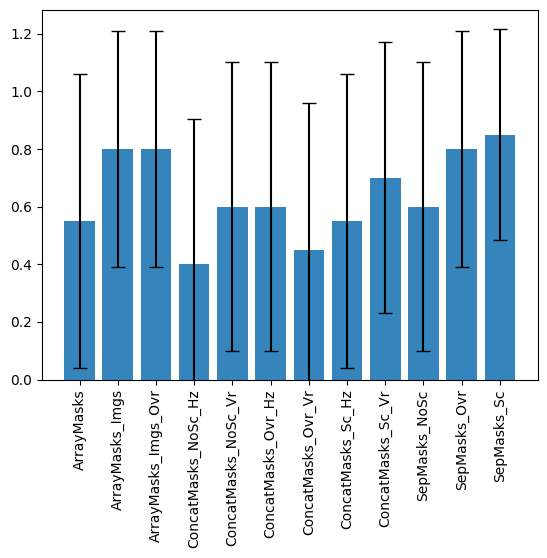

In [11]:
display(df_pred_prs.sort_index().describe().transpose().sort_index()[["mean", "std", "min", "max"]])
mean = df_pred_prs.transpose().sort_index().mean(axis=1)
std = df_pred_prs.transpose().sort_index().std(axis=1)
plt.bar(mean.index, mean, yerr=std, capsize=5, alpha=0.9)
plt.ylim(bottom=0)
plt.xticks(rotation=90)
plt.show()

In [8]:
display(df_mean_pred_prs.describe().iloc[[1, 2, 3, 7]])

,non-splitted
mean,0.641667
std,0.147453
min,0.400000
max,0.850000


## Score

In [9]:
df_score_prs.describe().transpose().sort_index()[["mean", "std", "min", "max"]]

,mean,std,min,max
ArrayMasks,3.15,1.089423,2.0,5.0
ArrayMasks_Imgs,3.85,1.089423,2.0,5.0
ArrayMasks_Imgs_Ovr,3.85,1.039990,2.0,5.0
ConcatMasks_NoSc_Hz,2.65,1.531253,1.0,5.0
ConcatMasks_NoSc_Vr,3.10,1.293709,1.0,5.0
ConcatMasks_Ovr_Hz,3.40,1.187656,1.0,5.0
ConcatMasks_Ovr_Vr,2.95,1.190975,1.0,5.0
ConcatMasks_Sc_Hz,3.20,1.281447,1.0,5.0
ConcatMasks_Sc_Vr,3.70,1.031095,2.0,5.0
SepMasks_NoSc,2.95,1.503505,1.0,5.0


In [10]:
display(df_mean_score_prs.describe().iloc[[1, 2, 3, 7]])

,non-splitted
mean,3.387500
std,0.448799
min,2.650000
max,4.000000
